# COVID-19 Literature Clustering



### Goal
Given a large amount of literature and rapidly spreading COVID-19, it is difficult for a scientist to keep up with the research community promptly. Can we cluster similar research articles together to make it easier for health professionals to find relevant research articles? Clustering can be used to create a tool to identify similar articles, given a target article. It can also reduce the number of articles one has to go through as one can focus on a cluster of articles rather than all. 

**Approach**:
<ol>
    <li>Unsupervised Learning task, because we don't have labels for the articles</li>
    <li>Clustering and Dimensionality Reduction task </li>
    <li>See how well labels from K-Means classify</li>
    <li>Use N-Grams with Hash Vectorizer</li>
    <li>Use plain text with Tf-idf</li>
    <li>Use K-Means for clustering</li>
    <li>Use t-SNE for dimensionality reduction</li>
    <li>Use PCA for dimensionality reduction</li>
    <li>There is no continuous flow of data, no need to adjust to changing data, and the data is small enough to fit in memmory: Batch Learning</li>
    <li>Altough, there is no continuous flow of data, our approach has to be scalable as there will be more literature later</li>
</ol>

### Dataset Description

>*In response to the COVID-19 pandemic, the White House and a coalition of leading research groups have prepared the COVID-19 Open Research Dataset (CORD-19). CORD-19 is a resource of over 29,000 scholarly articles, including over 13,000 with full text, about COVID-19, SARS-CoV-2, and related coronaviruses. This freely available dataset is provided to the global research community to apply recent advances in natural language processing and other AI techniques to generate new insights in support of the ongoing fight against this infectious disease. There is a growing urgency for these approaches because of the rapid acceleration in new coronavirus literature, making it difficult for the medical research community to keep up.*
#### Cite: [COVID-19 Open Research Dataset Challenge (CORD-19) | Kaggle](https://www.kaggle.com/allen-institute-for-ai/CORD-19-research-challenge) <br>


# Load the Data
Load the data following the notebook by Ivan Ega Pratama, from Kaggle.
#### Cite: [Dataset Parsing Code | Kaggle, COVID EDA: Initial Exploration Tool](https://www.kaggle.com/ivanegapratama/covid-eda-initial-exploration-tool)

### Loading Metadata

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import glob
import json

import matplotlib.pyplot as plt
plt.style.use('ggplot')

Let's load the metadata of the dateset. 'title' and 'journal' attributes may be useful later when we cluster the articles to see what kinds of articles cluster together.

In [4]:
root_path = 'CORD-19-research-challenge/'
metadata_path = f'{root_path}/metadata.csv'
meta_df = pd.read_csv(metadata_path, dtype={
    'pubmed_id': str,
    'Microsoft Academic Paper ID': str, 
    'doi': str
})
meta_df.head()

cord_uid                                       sha source_x  \
0  xqhn0vbp  1e1286db212100993d03cc22374b624f7caee956      PMC   
1  gi6uaa83  8ae137c8da1607b3a8e4c946c07ca8bda67f88ac      PMC   
2  le0ogx1s                                       NaN      PMC   
3  fy4w7xz8  0104f6ceccf92ae8567a0102f89cbb976969a774      PMC   
4  0qaoam29  5b68a553a7cbbea13472721cd1ad617d42b40c26      PMC   

                                               title                      doi  \
0  Airborne rhinovirus detection and effect of ul...    10.1186/1471-2458-3-5   
1    Discovering human history from stomach bacteria  10.1186/gb-2003-4-5-213   
2     A new recruit for the army of the men of death  10.1186/gb-2003-4-7-113   
3  Association of HLA class I with severe acute r...    10.1186/1471-2350-4-9   
4   A double epidemic model for the SARS propagation   10.1186/1471-2334-3-19   

       pmcid pubmed_id license  \
0  PMC140314  12525263   no-cc   
1  PMC156578  12734001   no-cc   
2  PMC193621  12844350   no-cc   
3  PMC212558  12969506   no-cc   
4  PMC222908  12964944   no-cc   

                                            abstract publish_time  \
0  BACKGROUND: Rhinovirus, the most common cause ...   2003-01-13   
1  Recent analyses of human pathogens have reveal...   2003-04-28   
2  The army of the men of death, in John Bunyan's...   2003-06-27   
3  BACKGROUND: The human leukocyte antigen (HLA) ...   2003-09-12   
4  BACKGROUND: An epidemic of a Severe Acute Resp...   2003-09-10   

                                             authors            journal  \
0  Myatt, Theodore A; Johnston, Sebastian L; Rudn...  BMC Public Health   
1                                   Disotell, Todd R        Genome Biol   
2                                  Petsko, Gregory A        Genome Biol   
3  Lin, Marie; Tseng, Hsiang-Kuang; Trejaut, Jean...      BMC Med Genet   
4  Ng, Tuen Wai; Turinici, Gabriel; Danchin, Antoine     BMC Infect Dis   

  Microsoft Academic Paper ID WHO #Covidence  has_pdf_parse  \
0                         NaN            NaN           True   
1                         NaN            NaN           True   
2                         NaN            NaN          False   
3                         NaN            NaN           True   
4                         NaN            NaN           True   

   has_pmc_xml_parse  full_text_file  \
0               True  custom_license   
1               True  custom_license   
2               True  custom_license   
3               True  custom_license   
4               True  custom_license   

                                                 url  
0  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...  
1  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...  
2  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...  
3  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2...  
4  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2...

In [5]:
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51078 entries, 0 to 51077
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   cord_uid                     51078 non-null  object
 1   sha                          38022 non-null  object
 2   source_x                     51078 non-null  object
 3   title                        50920 non-null  object
 4   doi                          47741 non-null  object
 5   pmcid                        41082 non-null  object
 6   pubmed_id                    37861 non-null  object
 7   license                      51078 non-null  object
 8   abstract                     42352 non-null  object
 9   publish_time                 51070 non-null  object
 10  authors                      48891 non-null  object
 11  journal                      46368 non-null  object
 12  Microsoft Academic Paper ID  964 non-null    object
 13  WHO #Covidence               17

### Fetch All of JSON File Path

Get path to all JSON files:

In [6]:
all_json = glob.glob(f'{root_path}/**/*.json', recursive=True)
len(all_json)

59311

### Helper Functions

 File Reader Class

In [7]:
class FileReader:
    def __init__(self, file_path):
        with open(file_path) as file:
            content = json.load(file)
            self.paper_id = content['paper_id']
            self.abstract = []
            self.body_text = []
            # Abstract
            for entry in content['abstract']:
                self.abstract.append(entry['text'])
            # Body text
            for entry in content['body_text']:
                self.body_text.append(entry['text'])
            self.abstract = '\n'.join(self.abstract)
            self.body_text = '\n'.join(self.body_text)
    def __repr__(self):
        return f'{self.paper_id}: {self.abstract[:200]}... {self.body_text[:200]}...'
    
# Helper function adds break after every words when character length reach to certain amount. This is for the interactive plot so that hover tool fits the screen.
    
def get_breaks(content, length):
    data = ""
    words = content.split(' ')
    total_chars = 0

    # add break every length characters
    for i in range(len(words)):
        total_chars += len(words[i])
        if total_chars > length:
            data = data + "<br>" + words[i]
            total_chars = 0
        else:
            data = data + " " + words[i]
    return data


### Load the Data into DataFrame

Using the helper functions, let's read in the articles into a DataFrame that can be used easily:

In [8]:
dict_ = {'paper_id': [], 'abstract': [], 'body_text': [], 'authors': [], 'title': [], 'journal': [], 'abstract_summary': []}
for idx, entry in enumerate(all_json):
    try:
        if idx % (len(all_json) // 10) == 0:
            print(f'Processing index: {idx} of {len(all_json)}')
        content = FileReader(entry)

        # get metadata information
        meta_data = meta_df.loc[meta_df['sha'] == content.paper_id]
        # no metadata, skip this paper
        if len(meta_data) == 0:
            continue

        dict_['paper_id'].append(content.paper_id)
        dict_['abstract'].append(content.abstract)
        dict_['body_text'].append(content.body_text)

        # also create a column for the summary of abstract to be used in a plot
        if len(content.abstract) == 0: 
            # no abstract provided
            dict_['abstract_summary'].append("Not provided.")
        elif len(content.abstract.split(' ')) > 100:
            # abstract provided is too long for plot, take first 300 words append with ...
            info = content.abstract.split(' ')[:100]
            summary = get_breaks(' '.join(info), 40)
            dict_['abstract_summary'].append(summary + "...")
        else:
            # abstract is short enough
            summary = get_breaks(content.abstract, 40)
            dict_['abstract_summary'].append(summary)

        # get metadata information
        meta_data = meta_df.loc[meta_df['sha'] == content.paper_id]

        try:
            # if more than one author
            authors = meta_data['authors'].values[0].split(';')
            if len(authors) > 2:
                # more than 2 authors, may be problem when plotting, so take first 2 append with ...
                dict_['authors'].append(". ".join(authors[:2]) + "...")
            else:
                # authors will fit in plot
                dict_['authors'].append(". ".join(authors))
        except Exception as e:
            # if only one author - or Null valie
            dict_['authors'].append(meta_data['authors'].values[0])

        # add the title information, add breaks when needed
        try:
            title = get_breaks(meta_data['title'].values[0], 40)
            dict_['title'].append(title)
        # if title was not provided
        except Exception as e:
            dict_['title'].append(meta_data['title'].values[0])

        # add the journal information
        dict_['journal'].append(meta_data['journal'].values[0])
        
    
    except Exception as e:
        continue
    
df_covid = pd.DataFrame(dict_, columns=['paper_id', 'abstract', 'body_text', 'authors', 'title', 'journal', 'abstract_summary'])
df_covid.head()

Processing index: 0 of 59311
Processing index: 5931 of 59311
Processing index: 11862 of 59311
Processing index: 17793 of 59311
Processing index: 23724 of 59311
Processing index: 29655 of 59311
Processing index: 35586 of 59311
Processing index: 41517 of 59311
Processing index: 47448 of 59311
Processing index: 53379 of 59311
Processing index: 59310 of 59311


paper_id  \
0  0015023cc06b5362d332b3baf348d11567ca2fbb   
1  00340eea543336d54adda18236424de6a5e91c9d   
2  004f0f8bb66cf446678dc13cf2701feec4f36d76   
3  00911cf4f99a3d5ae5e5b787675646a743574496   
4  00d16927588fb04d4be0e6b269fc02f0d3c2aa7b   

                                            abstract  \
0  word count: 194 22 Text word count: 5168 23 24...   
1  During the past three months, a new coronaviru...   
2                                                      
3  The fast accumulation of viral metagenomic dat...   
4  Infectious bronchitis (IB) causes significant ...   

                                           body_text  \
0  VP3, and VP0 (which is further processed to VP...   
1  In December 2019, a novel coronavirus, SARS-Co...   
2  The 2019-nCoV epidemic has spread across China...   
3  Metagenomic sequencing, which allows us to dir...   
4  Infectious bronchitis (IB), which is caused by...   

                                   authors  \
0  Joseph C. Ward.  Lidia Lasecka-Dykes...   
1          Carla Mavian.  Simone Marini...   
2             Hanchu Zhou.  Jianan Yang...   
3                  Jiayu Shang.  Yanni Sun   
4       Salman L. Butt.  Eric C. Erwood...   

                                               title journal  \
0   The RNA pseudoknots in foot-and-mouth disease...     NaN   
1   Regaining perspective on SARS-CoV-2<br>molecu...     NaN   
2   Healthcare-resource-adjusted<br>vulnerabiliti...     NaN   
3   CHEER: hierarCHical taxonomic<br>classificati...     NaN   
4   Real-time, MinION-based, amplicon<br>sequenci...     NaN   

                                    abstract_summary  
0   word count: 194 22 Text word count: 5168 23 2...  
1   During the past three months, a new coronavir...  
2                                      Not provided.  
3   The fast accumulation of viral metagenomic<br...  
4   Infectious bronchitis (IB) causes<br>signific...

In [9]:
dict_ = None

# Adding the Word Count Columns

Adding word count columns for both abstract and body_text can be useful parameters later:

In [10]:
df_covid['abstract_word_count'] = df_covid['abstract'].apply(lambda x: len(x.strip().split()))
df_covid['body_word_count'] = df_covid['body_text'].apply(lambda x: len(x.strip().split()))
df_covid.head()

paper_id  \
0  0015023cc06b5362d332b3baf348d11567ca2fbb   
1  00340eea543336d54adda18236424de6a5e91c9d   
2  004f0f8bb66cf446678dc13cf2701feec4f36d76   
3  00911cf4f99a3d5ae5e5b787675646a743574496   
4  00d16927588fb04d4be0e6b269fc02f0d3c2aa7b   

                                            abstract  \
0  word count: 194 22 Text word count: 5168 23 24...   
1  During the past three months, a new coronaviru...   
2                                                      
3  The fast accumulation of viral metagenomic dat...   
4  Infectious bronchitis (IB) causes significant ...   

                                           body_text  \
0  VP3, and VP0 (which is further processed to VP...   
1  In December 2019, a novel coronavirus, SARS-Co...   
2  The 2019-nCoV epidemic has spread across China...   
3  Metagenomic sequencing, which allows us to dir...   
4  Infectious bronchitis (IB), which is caused by...   

                                   authors  \
0  Joseph C. Ward.  Lidia Lasecka-Dykes...   
1          Carla Mavian.  Simone Marini...   
2             Hanchu Zhou.  Jianan Yang...   
3                  Jiayu Shang.  Yanni Sun   
4       Salman L. Butt.  Eric C. Erwood...   

                                               title journal  \
0   The RNA pseudoknots in foot-and-mouth disease...     NaN   
1   Regaining perspective on SARS-CoV-2<br>molecu...     NaN   
2   Healthcare-resource-adjusted<br>vulnerabiliti...     NaN   
3   CHEER: hierarCHical taxonomic<br>classificati...     NaN   
4   Real-time, MinION-based, amplicon<br>sequenci...     NaN   

                                    abstract_summary  abstract_word_count  \
0   word count: 194 22 Text word count: 5168 23 2...                  241   
1   During the past three months, a new coronavir...                  175   
2                                      Not provided.                    0   
3   The fast accumulation of viral metagenomic<br...                  139   
4   Infectious bronchitis (IB) causes<br>signific...                 1647   

   body_word_count  
0             1728  
1             2549  
2              755  
3             5188  
4             4003

In [11]:
df_covid['abstract'].describe(include='all')

count     36009
unique    26249
top            
freq       9704
Name: abstract, dtype: object

# Data Pre-processing-Handle Possible Duplicates

When we look at the unique values above, we can see that there are duplicates. It may have caused because of author submiting the article to multiple journals. Let's remove the duplicats from our dataset:

In [12]:
df_covid.dropna(inplace=True)
df_covid = df_covid[df_covid.abstract != ''] #Remove rows which are missing abstracts
df_covid = df_covid[df_covid.body_text != ''] #Remove rows which are missing body_text
df_covid.drop_duplicates(['abstract', 'body_text'], inplace=True) # remove duplicate rows having same abstract and body_text
df_covid['abstract'].describe(include='all')

count                                                 24584
unique                                                24552
top       Travel Medicine and Infectious Disease xxx (xx...
freq                                                      5
Name: abstract, dtype: object

In [13]:
df_covid['body_text'].describe(include='all')

count                                                 24584
unique                                                24584
top       iNTRODUCTiON Human beings are constantly expos...
freq                                                      1
Name: body_text, dtype: object

It looks like we didn't have duplicates. Instead, it was articles without Abstracts.

# Take a Look at the Data:

In [14]:
df_covid.head()

paper_id  \
1625  00142f93c18b07350be89e96372d240372437ed9   
1626  0022796bb2112abd2e6423ba2d57751db06049fb   
1627  0031e47b76374e05a18c266bd1a1140e5eacb54f   
1628  00326efcca0852dc6e39dc6b7786267e1bc4f194   
1629  00352a58c8766861effed18a4b079d1683fec2ec   

                                               abstract  \
1625  Dendritic cells (DCs) are specialized antigen-...   
1626  Dengue has a negative impact in low-and lower ...   
1627  Fecal microbial transplantation (FMT), a treat...   
1628  Fifteen years ago, United Nations world leader...   
1629  Posttranslational modification of proteins by ...   

                                              body_text  \
1625  iNTRODUCTiON Human beings are constantly expos...   
1626  Pathogens and vectors can now be transported r...   
1627  a1111111111 a1111111111 a1111111111 a111111111...   
1628  In addition to preventative care and nutrition...   
1629  Ubiquitination is a widely used posttranslatio...   

                                               authors  \
1625                Geginat, Jens.  Nizzoli, Giulia...   
1626            Viennet, Elvina.  Ritchie, Scott A....   
1627  McKinney, Caroline A..  Oliveira, Bruno C. M....   
1628            Turner, Erin L..  Nielsen, Katie R....   
1629           Hodul, Molly.  Dahlberg, Caroline L....   

                                                  title  \
1625   Immunity to Pathogens Taught by Specialized<b...   
1626   Public Health Responses to and Challenges for...   
1627   The fecal microbiota of healthy donor horses<...   
1628   A Review of Pediatric Critical Care in<br>Res...   
1629   Function of the Deubiquitinating Enzyme USP46...   

                      journal  \
1625            Front Immunol   
1626       PLoS Negl Trop Dis   
1627                 PLoS One   
1628            Front Pediatr   
1629  Front Synaptic Neurosci   

                                       abstract_summary  abstract_word_count  \
1625   Dendritic cells (DCs) are specialized<br>anti...                  309   
1626   Dengue has a negative impact in low-and lower...                  276   
1627   Fecal microbial transplantation (FMT), a<br>t...                  141   
1628   Fifteen years ago, United Nations world<br>le...                  151   
1629   Posttranslational modification of proteins<br...                  148   

      body_word_count  
1625             5305  
1626             7288  
1627             4669  
1628             7593  
1629             3156

In [15]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24584 entries, 1625 to 36008
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   paper_id             24584 non-null  object
 1   abstract             24584 non-null  object
 2   body_text            24584 non-null  object
 3   authors              24584 non-null  object
 4   title                24584 non-null  object
 5   journal              24584 non-null  object
 6   abstract_summary     24584 non-null  object
 7   abstract_word_count  24584 non-null  int64 
 8   body_word_count      24584 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 1.9+ MB


In [16]:
df_covid.describe()

abstract_word_count  body_word_count
count         24584.000000     24584.000000
mean            216.446673      4435.475106
std             137.065117      3657.421423
min               1.000000        23.000000
25%             147.000000      2711.000000
50%             200.000000      3809.500000
75%             255.000000      5431.000000
max            3694.000000    232431.000000

Now that we have our dataset loaded, we need to clean-up the text to improve any clustering or classification efforts. First, let's drop Null vales:

Limit number of articles to speed up computation:

In [17]:
# TA: Feel free to decrease this number if you think your system is getting stuck
df_covid = df_covid.head(5523)

Now let's remove punctuation from each text:

In [18]:
import re

df_covid['body_text'] = df_covid['body_text'].apply(lambda x: re.sub('[^a-zA-z0-9\s]','',x))
df_covid['abstract'] = df_covid['abstract'].apply(lambda x: re.sub('[^a-zA-z0-9\s]','',x))

Convert each text to lower case:

In [19]:
def lower_case(input_str):
    input_str = input_str.lower()
    return input_str

df_covid['body_text'] = df_covid['body_text'].apply(lambda x: lower_case(x))
df_covid['abstract'] = df_covid['abstract'].apply(lambda x: lower_case(x))

In [20]:
df_covid.head(4)

paper_id  \
1625  00142f93c18b07350be89e96372d240372437ed9   
1626  0022796bb2112abd2e6423ba2d57751db06049fb   
1627  0031e47b76374e05a18c266bd1a1140e5eacb54f   
1628  00326efcca0852dc6e39dc6b7786267e1bc4f194   

                                               abstract  \
1625  dendritic cells dcs are specialized antigenpre...   
1626  dengue has a negative impact in lowand lower m...   
1627  fecal microbial transplantation fmt a treatmen...   
1628  fifteen years ago united nations world leaders...   

                                              body_text  \
1625  introduction human beings are constantly expos...   
1626  pathogens and vectors can now be transported r...   
1627  a1111111111 a1111111111 a1111111111 a111111111...   
1628  in addition to preventative care and nutrition...   

                                               authors  \
1625                Geginat, Jens.  Nizzoli, Giulia...   
1626            Viennet, Elvina.  Ritchie, Scott A....   
1627  McKinney, Caroline A..  Oliveira, Bruno C. M....   
1628            Turner, Erin L..  Nielsen, Katie R....   

                                                  title             journal  \
1625   Immunity to Pathogens Taught by Specialized<b...       Front Immunol   
1626   Public Health Responses to and Challenges for...  PLoS Negl Trop Dis   
1627   The fecal microbiota of healthy donor horses<...            PLoS One   
1628   A Review of Pediatric Critical Care in<br>Res...       Front Pediatr   

                                       abstract_summary  abstract_word_count  \
1625   Dendritic cells (DCs) are specialized<br>anti...                  309   
1626   Dengue has a negative impact in low-and lower...                  276   
1627   Fecal microbial transplantation (FMT), a<br>t...                  141   
1628   Fifteen years ago, United Nations world<br>le...                  151   

      body_word_count  
1625             5305  
1626             7288  
1627             4669  
1628             7593

Now that we have the text cleaned up, we can create our features vector which can be fed into a clustering or dimensionality reduction algorithm. For our first try, we will focus on the text on the body of the articles. Let's grab that:

In [21]:
text = df_covid.drop(["paper_id", "abstract", "abstract_word_count", "body_word_count", "authors", "title", "journal", "abstract_summary"], axis=1)

In [22]:
text.head(5)

body_text
1625  introduction human beings are constantly expos...
1626  pathogens and vectors can now be transported r...
1627  a1111111111 a1111111111 a1111111111 a111111111...
1628  in addition to preventative care and nutrition...
1629  ubiquitination is a widely used posttranslatio...

Let's transform 1D DataFrame into 1D list where each index is an article (instance), so that we can work with words from each instance:

In [23]:
text_arr = text.stack().tolist()
len(text_arr)

5523

# 2-Grams

Let's create 2D list, where each row is instance and each column is a word. Meaning, we will separate each instance into words:  

In [24]:
words = []
for ii in range(0,len(text)):
    words.append(str(text.iloc[ii]['body_text']).split(" "))

In [25]:
print(words[0][:20])

['introduction', 'human', 'beings', 'are', 'constantly', 'exposed', 'to', 'a', 'myriad', 'of', 'pathogens', 'including', 'bacteria', 'fungi', 'and', 'viruses', 'these', 'foreign', 'invaders', 'or']


What we want now is n-grams from the words where n=2 (2-gram). We will still have 2D array where each row is an instance; however, each index in that row going to be a 2-gram:

In [26]:
n_gram_all = []

for word in words:
    # get n-grams for the instance
    n_gram = []
    for i in range(len(word)-2+1):
        n_gram.append("".join(word[i:i+2]))
    n_gram_all.append(n_gram)

In [27]:
n_gram_all[0][:10]

['introductionhuman',
 'humanbeings',
 'beingsare',
 'areconstantly',
 'constantlyexposed',
 'exposedto',
 'toa',
 'amyriad',
 'myriadof',
 'ofpathogens']

# Vectorize with HashingVectorizer

Now we will use HashVectorizer to create the features vector X. For now, let's limit the feature size to 2**12(4096) to speed up the computation. We might need to increase this later to reduce the collusions and improve the accuracy:

In [54]:
from sklearn.feature_extraction.text import HashingVectorizer

# hash vectorizer instance
hvec = HashingVectorizer(lowercase=False, analyzer=lambda l:l, n_features=2**13)

# features matrix X
X = hvec.fit_transform(n_gram_all)

In [55]:
X.shape

(5523, 8192)

#### Separete Training and Test Set

In [56]:
from sklearn.model_selection import train_test_split

# test set size of 20% of the data and the random seed 42 <3
X_train, X_test = train_test_split(X.toarray(), test_size=0.2, random_state=42)

print("X_train size:", len(X_train))
print("X_test size:", len(X_test), "\n")

X_train size: 4418
X_test size: 1105 



# Dimensionality Reduction with t-SNE
Using t-SNE we can reduce our high dimensional features vector into 2 dimensional plane. In the process, t-SNE will keep similar instances together while trying to push different instances far from each other. Resulting 2-D plane can be useful to see which articles cluster near each other:

In [57]:
# Following cell will take 15-20 minutes to run

from sklearn.manifold import TSNE

tsne = TSNE(verbose=1, perplexity=5, init='random', learning_rate='auto')
X_embedded = tsne.fit_transform(X_train)

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 4418 samples in 0.076s...
[t-SNE] Computed neighbors for 4418 samples in 2.862s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4418
[t-SNE] Computed conditional probabilities for sample 2000 / 4418
[t-SNE] Computed conditional probabilities for sample 3000 / 4418
[t-SNE] Computed conditional probabilities for sample 4000 / 4418
[t-SNE] Computed conditional probabilities for sample 4418 / 4418
[t-SNE] Mean sigma: 0.143182
[t-SNE] KL divergence after 250 iterations with early exaggeration: 135.781219
[t-SNE] KL divergence after 1000 iterations: 3.745123


Let's plot the result:

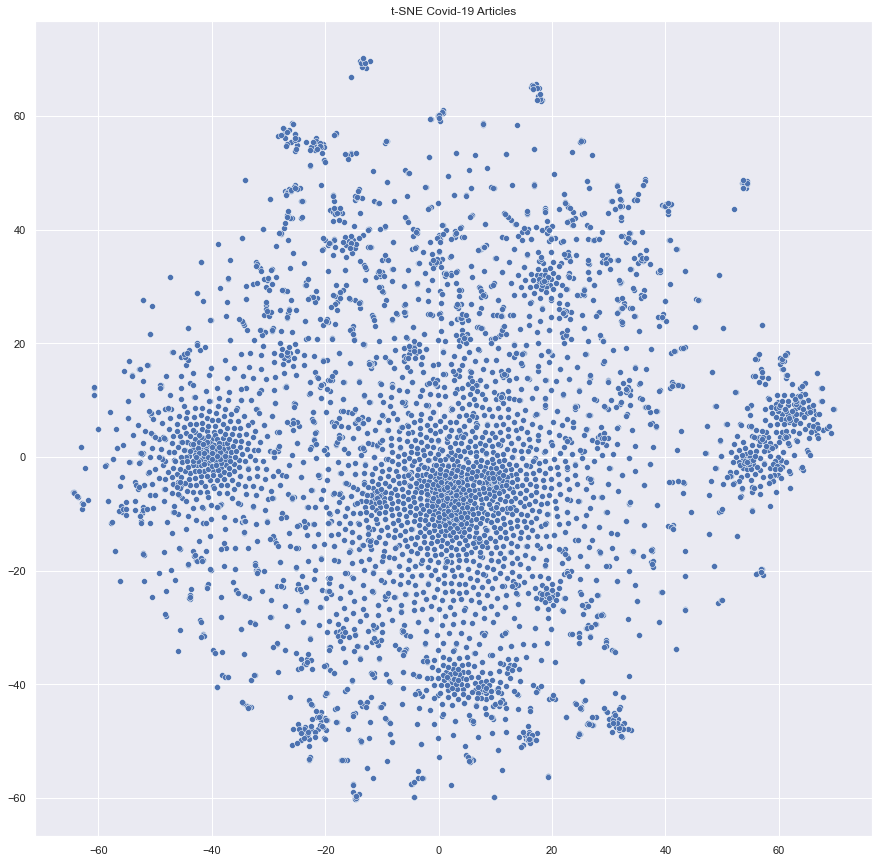

In [58]:
from matplotlib import pyplot as plt
import seaborn as sns

# sns settings
sns.set(rc={'figure.figsize':(15,15)})

# colors
palette = sns.color_palette("bright", 1)

# plot
sns.scatterplot(x=X_embedded[:,0], y=X_embedded[:,1], palette=palette)

plt.title("t-SNE Covid-19 Articles")
# plt.savefig("plots/t-sne_covid19.png")
plt.show()

We can clearly see few clusters forming. This may be a good sign that we are able to cluster similar articles together using 2-grams and HashVectorizer with 2**10 features. However, without labels it is difficult to see the clusters. For now, it looks like a blob of data... Let's try if we can use K-Means to generate our labels. We can later use this information to produce a scatterplot with labels to verify the clusters.

# Unsupervised Learning: Clustering with K-Means

Using K-means we will get the labels we need. For now, we will create 10 clusters. I am choosing this arbitrarily. We can change this later.

In [73]:
# Following cell will take 4-5 minutes to run

from sklearn.cluster import KMeans

k = 20
kmeans = KMeans(n_clusters=k, verbose=10)
y_pred = kmeans.fit_predict(X_train)

Initialization complete
Iteration 0, inertia 6022.715884873988
Iteration 1, inertia 3356.5174251500803
Iteration 2, inertia 3324.573610200645
Iteration 3, inertia 3310.1841724729093
Iteration 4, inertia 3304.2462376003914
Iteration 5, inertia 3301.136469762886
Iteration 6, inertia 3299.129457503606
Iteration 7, inertia 3297.7691909459368
Iteration 8, inertia 3296.860363779444
Iteration 9, inertia 3296.160700872119
Iteration 10, inertia 3295.3280748473476
Iteration 11, inertia 3294.347633287274
Iteration 12, inertia 3293.403813667005
Iteration 13, inertia 3292.644078349116
Iteration 14, inertia 3291.882140389173
Iteration 15, inertia 3291.692677845469
Iteration 16, inertia 3291.615863836575
Iteration 17, inertia 3291.590909991181
Iteration 18, inertia 3291.5771975756315
Iteration 19, inertia 3291.56573710622
Iteration 20, inertia 3291.561443270124
Converged at iteration 20: strict convergence.
Initialization complete
Iteration 0, inertia 5878.771824253871
Iteration 1, inertia 3363.47133

Initialization complete
Iteration 0, inertia 5946.233705305833
Iteration 1, inertia 3365.707601363963
Iteration 2, inertia 3334.038086523849
Iteration 3, inertia 3320.6717477931047
Iteration 4, inertia 3312.04496480346
Iteration 5, inertia 3308.4289333519782
Iteration 6, inertia 3306.4329213599267
Iteration 7, inertia 3304.7588933820457
Iteration 8, inertia 3303.2244436931696
Iteration 9, inertia 3301.7317390563726
Iteration 10, inertia 3300.5418270032987
Iteration 11, inertia 3299.645326492997
Iteration 12, inertia 3299.0388532191578
Iteration 13, inertia 3298.455328598956
Iteration 14, inertia 3297.749591184023
Iteration 15, inertia 3297.07932060872
Iteration 16, inertia 3296.6031285849085
Iteration 17, inertia 3296.2143965236555
Iteration 18, inertia 3295.8250487720725
Iteration 19, inertia 3295.559804010326
Iteration 20, inertia 3295.364213127747
Iteration 21, inertia 3295.1890992148715
Iteration 22, inertia 3295.0704997361513
Iteration 23, inertia 3294.9734697381186
Iteration 24, 

Labels for the training set:

In [74]:
y_train = y_pred

Labels for the test set:

In [75]:
y_test = kmeans.predict(X_test)

Now that we have the labels, let's plot the t-SNE. scatterplot again and see if we have any obvious clusters:

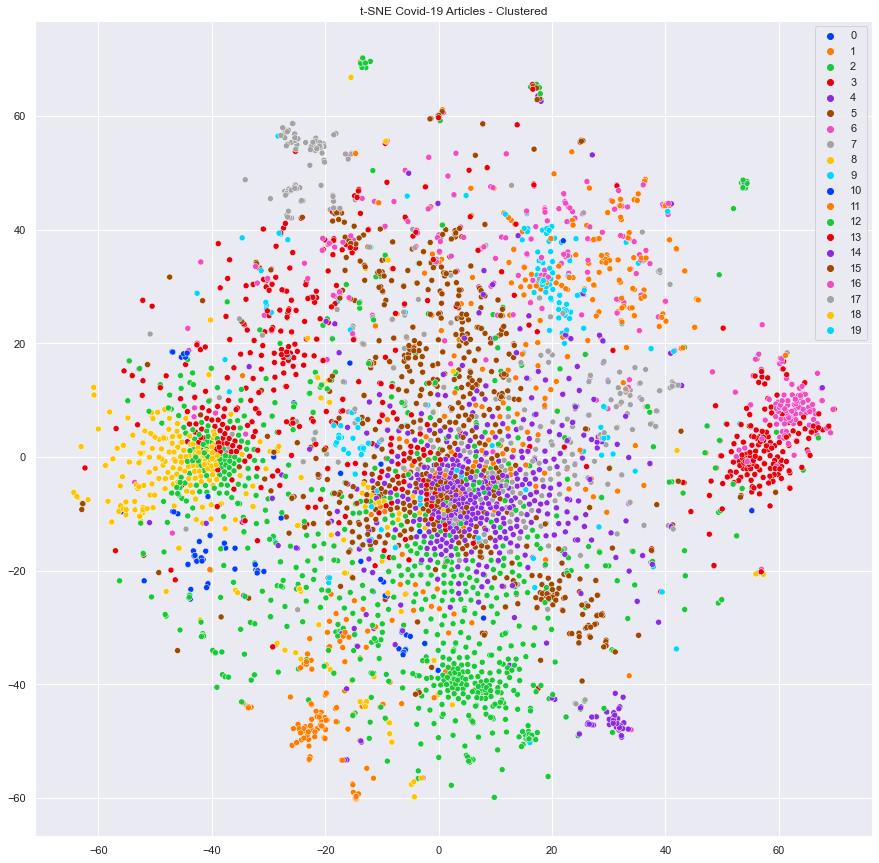

In [76]:
# sns settings
sns.set(rc={'figure.figsize':(15,15)})

# colors
palette = sns.color_palette("bright", len(set(y_pred)))

# plot
sns.scatterplot(x=X_embedded[:,0], y=X_embedded[:,1], hue=y_pred, legend='full', palette=palette)
plt.title("t-SNE Covid-19 Articles - Clustered")
# plt.savefig("plots/t-sne_covid19_label.png")
plt.show()

That looks pretty promising. It can be seen that articles from the same cluster are near each other, forming groups. There are still overlaps. So we will have to see if we can improve this by changing the cluster size, using another clustering algorithm, or different feature size. We can also consider not using 2-grams, or HashVectorizer. We can try 3-grams, 4-grams, or plain text as our instances and vectorize them using either HashVectorizer, Tf-idfVectorizer, or Burrows Wheeler Transform Distance. <br>

Before we try another method for clustering, we want to see how well it will classify using the labels we just created using K-Means.

# Classify

### Helper Function:

In [63]:
# function to print out classification model report
def classification_report(model_name, test, pred):
    from sklearn.metrics import precision_score, recall_score
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import f1_score
    
    print(model_name, ":\n")
    print("Accuracy Score: ", '{:,.3f}'.format(float(accuracy_score(test, pred)) * 100), "%")
    print("     Precision: ", '{:,.3f}'.format(float(precision_score(test, pred, average='micro')) * 100), "%")
    print("        Recall: ", '{:,.3f}'.format(float(recall_score(test, pred, average='micro')) * 100), "%")
    print("      F1 score: ", '{:,.3f}'.format(float(f1_score(test, pred, average='micro')) * 100), "%")

### Random Forest

In [64]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# random forest classifier instance
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# cross validation on the training set 
forest_scores = cross_val_score(forest_clf, X_train, y_train, cv=3, n_jobs=-1)

# print out the mean of the cross validation scores
print("Accuracy: ", '{:,.3f}'.format(float(forest_scores.mean()) * 100), "%")

Accuracy:  65.958 %


In [65]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score

# cross validate predict on the training set
forest_train_pred = cross_val_predict(forest_clf, X_train, y_train, cv=3, n_jobs=-1)

# print precision and recall scores
print("Precision: ", '{:,.3f}'.format(float(precision_score(y_train, forest_train_pred, average='macro')) * 100), "%")
print("   Recall: ", '{:,.3f}'.format(float(recall_score(y_train, forest_train_pred, average='macro')) * 100), "%")

Precision:  69.885 %
   Recall:  54.436 %


C:\Users\acbon\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [66]:
# first train the model
forest_clf.fit(X_train, y_train)

# make predictions on the test set
forest_pred = forest_clf.predict(X_test)

In [67]:
# print out the classification report
classification_report("Random Forest Classifier Report (Test Set)", y_test, forest_pred)

Random Forest Classifier Report (Test Set) :

Accuracy Score:  68.235 %
     Precision:  68.235 %
        Recall:  68.235 %
      F1 score:  68.235 %


It looks like it doesn't overfit, which is good news. But results can be better than ~70-80%.

# Vectorize Using Tf-idf with Plain Text
Let's see if we will be able to get better clusters using plain text as instances rather than 2-grams and vectorize it using Tf-idf. Last time we separated the dataset into test and training sets because we wanted to do classification with the labels we got through clustering. This time we will just use the all dataset because the goal is to cluster all literature.

### Vectorize

In [89]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=2**10)
X = vectorizer.fit_transform(df_covid['body_text'].values)

In [90]:
X.shape

(5523, 1024)

# MiniBatchKMeans with Plain text and Tf-idf

Again, let's try to get our labels. We will choose 10 clusters again. This time, we will use MiniBatchKMeans as it is faster with more data:

In [91]:
from sklearn.cluster import MiniBatchKMeans

k = 20
kmeans = MiniBatchKMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)

Get the labels:

In [92]:
y = y_pred

# Dimensionality Reduction with t-SNE (Plain text and Tf-idf)

Let's reduce the dimensionality using t-SNE again:

In [93]:
from sklearn.manifold import TSNE

tsne = TSNE(verbose=1,init='random', learning_rate='auto')
X_embedded = tsne.fit_transform(X.toarray())

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5523 samples in 0.012s...
[t-SNE] Computed neighbors for 5523 samples in 1.259s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5523
[t-SNE] Computed conditional probabilities for sample 2000 / 5523
[t-SNE] Computed conditional probabilities for sample 3000 / 5523
[t-SNE] Computed conditional probabilities for sample 4000 / 5523
[t-SNE] Computed conditional probabilities for sample 5000 / 5523
[t-SNE] Computed conditional probabilities for sample 5523 / 5523
[t-SNE] Mean sigma: 0.161256
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.693794
[t-SNE] KL divergence after 1000 iterations: 2.000881


### Plot t-SNE

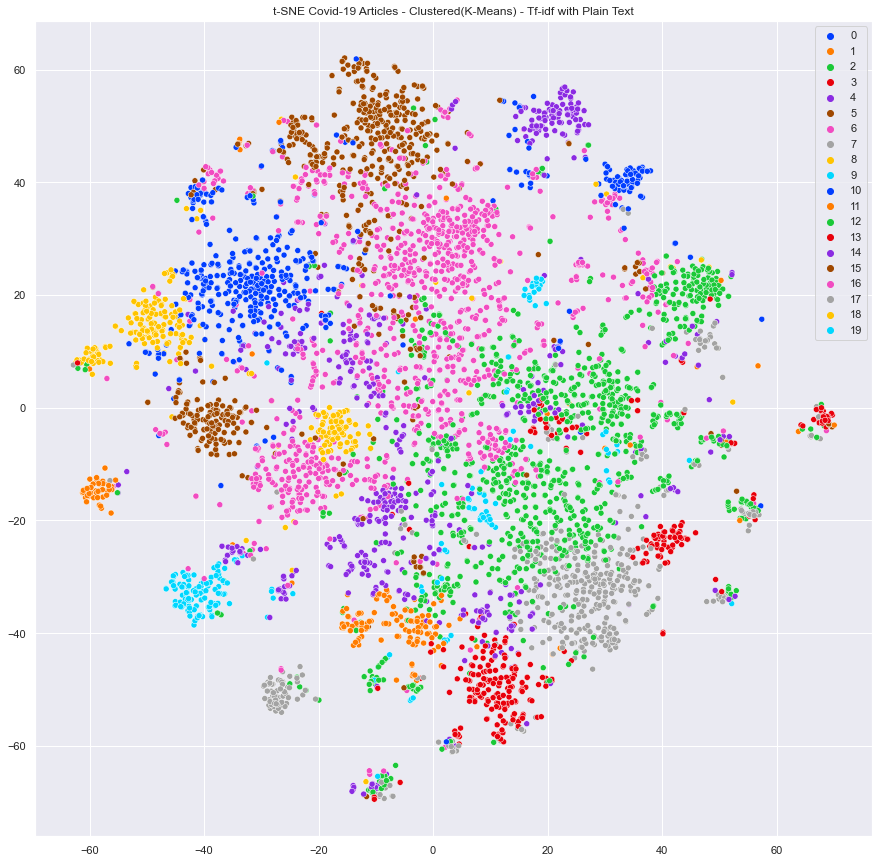

In [94]:
from matplotlib import pyplot as plt
import seaborn as sns

# sns settings
sns.set(rc={'figure.figsize':(15,15)})

# colors
palette = sns.color_palette("bright", len(set(y)))

# plot
sns.scatterplot(x=X_embedded[:,0], y=X_embedded[:,1], hue=y, legend='full', palette=palette)
plt.title("t-SNE Covid-19 Articles - Clustered(K-Means) - Tf-idf with Plain Text")
# plt.savefig("plots/t-sne_covid19_label_TFID.png")
plt.show()

This time we are able to see the clusters more clearly. There are clusters that further apart from each other. I can also start to see that there is possibly more than 10 clusters we need to identify using k-means.

# Dimensionality Reduction with PCA (Plain text and Tf-idf)

t-SNE doesn't scale well. This is why run-time of this Notebook is about 40 minutes to 1 hour with an average computer. Let's try to see if we dan achive good results with PCA as it scales very well with larger datasets and dimensions:

In [95]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_result = pca.fit_transform(X.toarray())

### Plot PCA

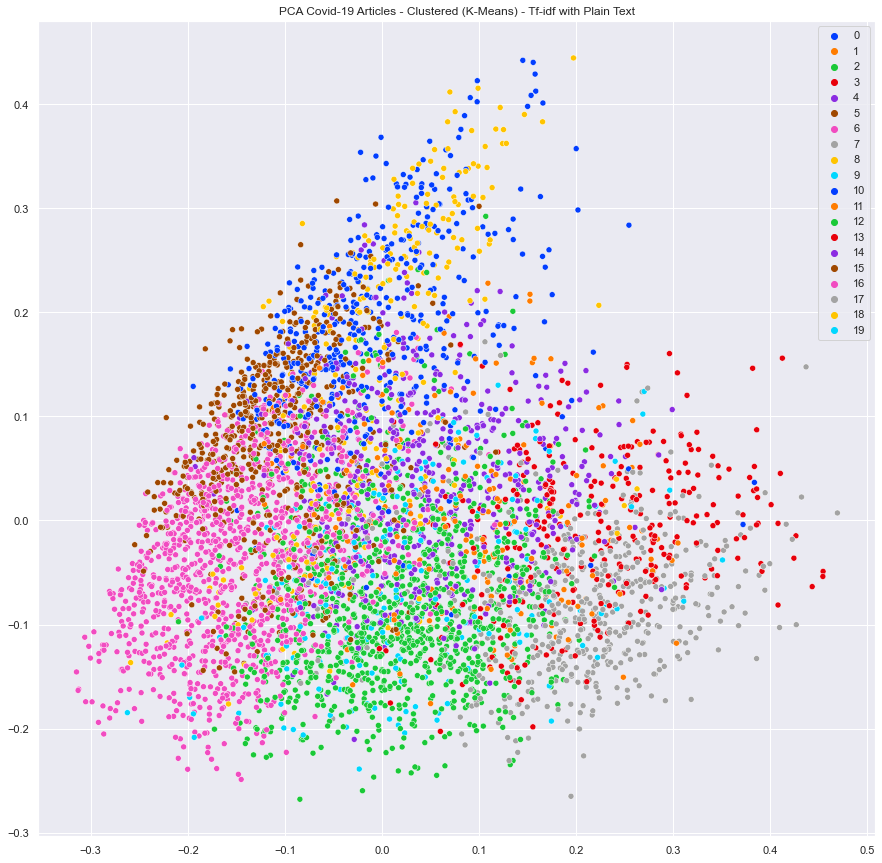

In [96]:
# sns settings
sns.set(rc={'figure.figsize':(15,15)})

# colors
palette = sns.color_palette("bright", len(set(y)))

# plot
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], hue=y, legend='full', palette=palette)
plt.title("PCA Covid-19 Articles - Clustered (K-Means) - Tf-idf with Plain Text")
# plt.savefig("plots/pca_covid19_label_TFID.png")
plt.show()

Sometimes it may be easier to see the results in a 3 dimensional plot. So let's try to do that:

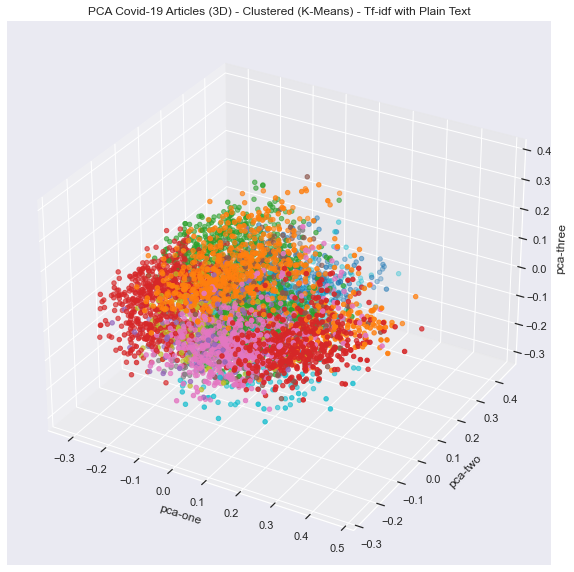

In [97]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

ax = plt.figure(figsize=(16,10)).add_subplot(projection='3d')
ax.scatter(
    xs=pca_result[:,0], 
    ys=pca_result[:,1], 
    zs=pca_result[:,2], 
    c=y, 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.title("PCA Covid-19 Articles (3D) - Clustered (K-Means) - Tf-idf with Plain Text")
# plt.savefig("plots/pca_covid19_label_TFID_3d.png")
plt.show()

# More Clusters?
On our previous plot we could see that there is more clusters than only 10. Let's try to label them:

In [98]:
from sklearn.cluster import MiniBatchKMeans

k = 20
kmeans = MiniBatchKMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)
y = y_pred

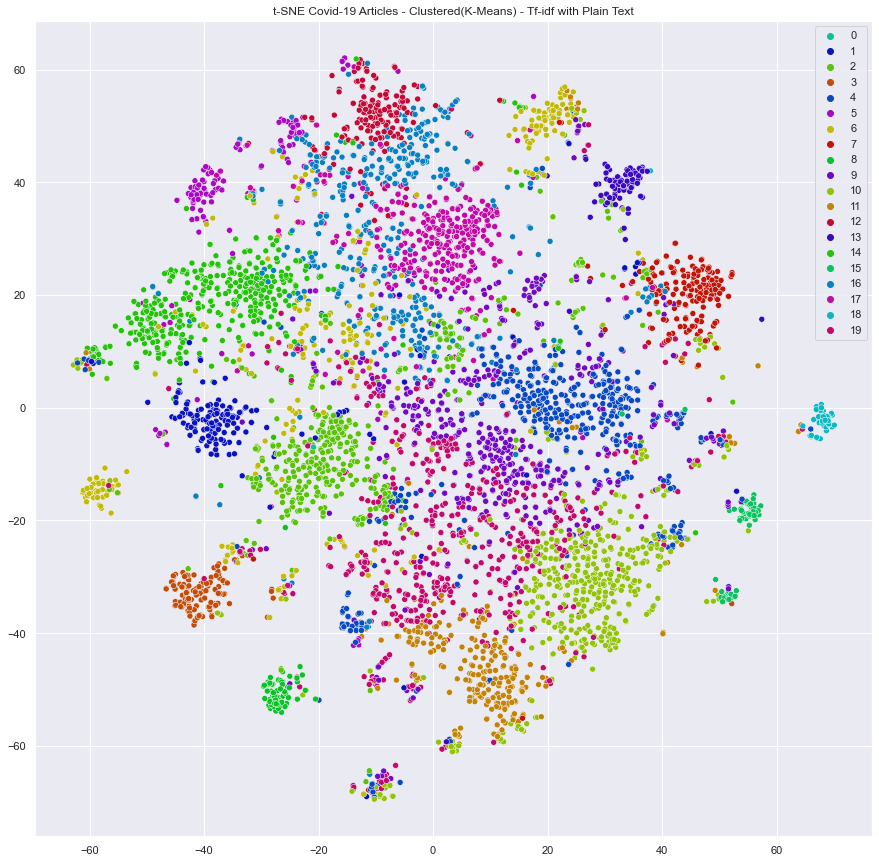

In [99]:
from matplotlib import pyplot as plt
import seaborn as sns
import random 

# sns settings
sns.set(rc={'figure.figsize':(15,15)})

# let's shuffle the list so distinct colors stay next to each other
palette = sns.hls_palette(20, l=.4, s=.9)
random.shuffle(palette)

# plot
sns.scatterplot(x=X_embedded[:,0], y=X_embedded[:,1], hue=y, legend='full', palette=palette)
plt.title("t-SNE Covid-19 Articles - Clustered(K-Means) - Tf-idf with Plain Text")
# plt.savefig("plots/t-sne_covid19_20label_TFID.png")
plt.show()

It would be helpful if we have a demo tool that can be used to see what articles are identified as similar using our Clustering and Dimensionality Reduction, right? Let's put together a interactive scatter plot of t-SNE to do that.

# Interactive t-SNE

In [104]:
from bokeh.models import ColumnDataSource, HoverTool, LinearColorMapper, CustomJS
from bokeh.palettes import Category20
from bokeh.transform import linear_cmap
from bokeh.io import output_file, show
from bokeh.transform import transform
from bokeh.io import output_notebook
from bokeh.plotting import figure
from bokeh.layouts import column
from bokeh.models import RadioButtonGroup
from bokeh.models import TextInput
from bokeh.layouts import gridplot
from bokeh.models import Div
from bokeh.models import Paragraph
from bokeh.layouts import column, widgetbox

output_notebook()
y_labels = y_pred

# data sources
source = ColumnDataSource(data=dict(
    x= X_embedded[:,0], 
    y= X_embedded[:,1],
    x_backup = X_embedded[:,0],
    y_backup = X_embedded[:,1],
    desc= y_labels, 
    titles= df_covid['title'],
    authors = df_covid['authors'],
    journal = df_covid['journal'],
    abstract = df_covid['abstract_summary'],
    labels = ["C-" + str(x) for x in y_labels]
    ))

# hover over information
hover = HoverTool(tooltips=[
    ("Title", "@titles{safe}"),
    ("Author(s)", "@authors"),
    ("Journal", "@journal"),
    ("Abstract", "@abstract{safe}"),
    ("Label", "@labels")
],
                 point_policy="follow_mouse")

# map colors
mapper = linear_cmap(field_name='desc', 
                     palette=Category20[20],
                     low=min(y_labels) ,high=max(y_labels))

# prepare the figure
p = figure(plot_width=800, plot_height=800, 
           tools=[hover, 'pan', 'wheel_zoom', 'box_zoom', 'reset'], 
           title="t-SNE Covid-19 Articles, Clustered(K-Means), Tf-idf with Plain Text", 
           toolbar_location="right")

# plot
p.scatter('x', 'y', size=5, 
          source=source,
          fill_color=mapper,
          line_alpha=0.3,
          line_color="black",
          legend_label = 'labels')

# add callback to control 
callback = CustomJS(args=dict(p=p, source=source), code="""
            
            var radio_value = cb_obj.active;
            var data = source.data; 
            
            x = data['x'];
            y = data['y'];
            
            x_backup = data['x_backup'];
            y_backup = data['y_backup'];
            
            labels = data['desc'];
            
            if (radio_value == '20') {
                for (i = 0; i < x.length; i++) {
                    x[i] = x_backup[i];
                    y[i] = y_backup[i];
                }
            }
            else {
                for (i = 0; i < x.length; i++) {
                    if(labels[i] == radio_value) {
                        x[i] = x_backup[i];
                        y[i] = y_backup[i];
                    } else {
                        x[i] = undefined;
                        y[i] = undefined;
                    }
                }
            }


        source.change.emit();
        """)

# callback for searchbar
keyword_callback = CustomJS(args=dict(p=p, source=source), code="""
            
            var text_value = cb_obj.value;
            var data = source.data; 
            
            x = data['x'];
            y = data['y'];
            
            x_backup = data['x_backup'];
            y_backup = data['y_backup'];
            
            abstract = data['abstract'];
            titles = data['titles'];
            authors = data['authors'];
            journal = data['journal'];

            for (i = 0; i < x.length; i++) {
                if(abstract[i].includes(text_value) || 
                   titles[i].includes(text_value) || 
                   authors[i].includes(text_value) || 
                   journal[i].includes(text_value)) {
                    x[i] = x_backup[i];
                    y[i] = y_backup[i];
                } else {
                    x[i] = undefined;
                    y[i] = undefined;
                }
            }
            


        source.change.emit();
        """)

# option
option = RadioButtonGroup(labels=["C-0", "C-1", "C-2",
                                  "C-3", "C-4", "C-5",
                                  "C-6", "C-7", "C-8",
                                  "C-9", "C-10", "C-11",
                                  "C-12", "C-13", "C-14",
                                  "C-15", "C-16", "C-17",
                                  "C-18", "C-19", "All"], 
                          active=20)
#option.js_on_click(callback)
option.js_on_event('tap',callback)

# search box
keyword = TextInput(title="Search:")
keyword.js_on_event('tap', keyword_callback)

#header
header = Div(text="""<h1>COVID-19 Literature Cluster</h1>""")

# show
show(column(header, column(option, keyword),p))

Loading BokehJS ...

#### Please see the tools on right top.
#### If the text doesn't fit in the screen on the above plot when hover, please try the 'Box Zoom' tool to zoom to the area where the target plot is. This will help the hover message to fit the screen. 
#### Use the 'Reset' button to revert the zoom.

This notebook is adaption from the following kaggle notebook https://www.kaggle.com/maksimeren/covid-19-literature-clustering
### You can find the full version of the interactive plot here on GitHub: 
#### https://maksimekin.github.io/COVID19-Literature-Clustering/plots/t-sne_covid-19_interactive.html
